In [1]:
import os
import pandas as pd
import numpy as np
from pyDOE import lhs
import json
from post_processing import postprocessing
import itertools
import multiprocessing

current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
print(current_dir)

from main_sim import run_DES

c:\Users\leroytomas\Desktop\GitHub\test_des_sim\src


c:\Users\leroytomas\pythonEnv\des_env\Lib\site-packages\simpy\__init__.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution


In [2]:
# Excel-Datei laden
df_raw = pd.read_excel("optimal_config/configurations.xlsx", header=None)

# Dictionary mit Parameterwerten erzeugen
parameter_values = {}
for i, row in df_raw.iterrows():
    param = row.iloc[0]  # Erster Wert in der Zeile = Parametername
    # Restliche Werte (ohne NaN) in Liste umwandeln
    values = row.iloc[1:].dropna().tolist()
    parameter_values[param] = values

# Alle Kombinationen bilden
keys = list(parameter_values.keys())
combinations = list(itertools.product(*parameter_values.values()))

# DataFrame mit allen Kombinationen
df_combinations = pd.DataFrame(combinations, columns=keys)

# Lösche alle Konfigurationen mit einer Wärmeerzeuger-Kapazität weniger 200 kW
df_combinations = df_combinations[df_combinations['hp'].str[4:6].astype(int) + df_combinations['chp'] + df_combinations['boiler'] >= 200]

# Ausgabe
print(df_combinations.head())
print(f"Anzahl Kombinationen: {len(df_combinations)}")

           hp  chp  boiler  pv supply_config hr_mode  T_dhw_sp  hwt_volume
216  Air_30kW    0     200  25      2-runner      on        65       10000
217  Air_30kW    0     200  25      2-runner      on        65       15000
218  Air_30kW    0     200  25      2-runner      on        65       20000
219  Air_30kW    0     200  25      2-runner      on        60       10000
220  Air_30kW    0     200  25      2-runner      on        60       15000
Anzahl Kombinationen: 7992


In [3]:
df_combinations['hp'].str[4:6].astype(int)


216      30
217      30
218      30
219      30
220      30
         ..
10363    40
10364    40
10365    40
10366    40
10367    40
Name: hp, Length: 7992, dtype: int32

2025-08-20 13:06:33.930 | INFO     | mosaik.scenario:start:280 - Starting "CSV" as "CSV-0" ...
2025-08-20 13:06:33.988 | INFO     | mosaik.scenario:start:280 - Starting "CSV" as "CSV-1" ...
2025-08-20 13:06:34.066 | INFO     | mosaik.scenario:start:280 - Starting "CSV_writer" as "CSV_writer-0" ...
2025-08-20 13:06:34.067 | INFO     | mosaik.scenario:start:280 - Starting "CSV_writer" as "CSV_writer-1" ...
2025-08-20 13:06:34.067 | INFO     | mosaik.scenario:start:280 - Starting "HeatPumpSim" as "HeatPumpSim-0" ...


PVlib simulation finished!


2025-08-20 13:06:34.278 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-0" ...
2025-08-20 13:06:34.302 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-1" ...
2025-08-20 13:06:34.303 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-2" ...
2025-08-20 13:06:34.305 | INFO     | mosaik.scenario:start:280 - Starting "ControllerSim" as "ControllerSim-0" ...
2025-08-20 13:06:34.309 | INFO     | mosaik.scenario:start:280 - Starting "Chpsim_v2" as "Chpsim_v2-0" ...
2025-08-20 13:06:34.313 | INFO     | mosaik.scenario:start:280 - Starting "Boilersim_v2" as "Boilersim_v2-0" ...
2025-08-20 13:06:34.364 | INFO     | mosaik.scenario:run:598 - Starting simulation.
100%|██████████| 432000/432000 [00:04<00:00, 88835.46steps/s]
2025-08-20 13:06:39.250 | INFO     | mosaik.scenario:run:646 - Simulation finished successfully.
2025-08-20 13:06:45.648 | INFO     | mosaik.scenario:start:280 - 

PVlib simulation finished!


100%|██████████| 432000/432000 [00:04<00:00, 91377.76steps/s]
2025-08-20 13:06:50.563 | INFO     | mosaik.scenario:run:646 - Simulation finished successfully.
2025-08-20 13:06:56.739 | INFO     | mosaik.scenario:start:280 - Starting "CSV" as "CSV-0" ...
2025-08-20 13:06:56.791 | INFO     | mosaik.scenario:start:280 - Starting "CSV" as "CSV-1" ...
2025-08-20 13:06:56.861 | INFO     | mosaik.scenario:start:280 - Starting "CSV_writer" as "CSV_writer-0" ...
2025-08-20 13:06:56.862 | INFO     | mosaik.scenario:start:280 - Starting "CSV_writer" as "CSV_writer-1" ...
2025-08-20 13:06:56.864 | INFO     | mosaik.scenario:start:280 - Starting "HeatPumpSim" as "HeatPumpSim-0" ...
2025-08-20 13:06:56.864 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-0" ...
2025-08-20 13:06:56.867 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-1" ...
2025-08-20 13:06:56.868 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterT

PVlib simulation finished!


100%|██████████| 432000/432000 [00:04<00:00, 88891.78steps/s]
2025-08-20 13:07:01.778 | INFO     | mosaik.scenario:run:646 - Simulation finished successfully.
2025-08-20 13:07:07.847 | INFO     | mosaik.scenario:start:280 - Starting "CSV" as "CSV-0" ...
2025-08-20 13:07:07.902 | INFO     | mosaik.scenario:start:280 - Starting "CSV" as "CSV-1" ...
2025-08-20 13:07:07.974 | INFO     | mosaik.scenario:start:280 - Starting "CSV_writer" as "CSV_writer-0" ...
2025-08-20 13:07:07.975 | INFO     | mosaik.scenario:start:280 - Starting "CSV_writer" as "CSV_writer-1" ...
2025-08-20 13:07:07.976 | INFO     | mosaik.scenario:start:280 - Starting "HeatPumpSim" as "HeatPumpSim-0" ...
2025-08-20 13:07:07.977 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-0" ...
2025-08-20 13:07:07.977 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-1" ...
2025-08-20 13:07:07.978 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterT

PVlib simulation finished!


100%|██████████| 432000/432000 [00:05<00:00, 85519.96steps/s]
2025-08-20 13:07:13.081 | INFO     | mosaik.scenario:run:646 - Simulation finished successfully.
2025-08-20 13:07:19.633 | INFO     | mosaik.scenario:start:280 - Starting "CSV" as "CSV-0" ...
2025-08-20 13:07:19.686 | INFO     | mosaik.scenario:start:280 - Starting "CSV" as "CSV-1" ...
2025-08-20 13:07:19.761 | INFO     | mosaik.scenario:start:280 - Starting "CSV_writer" as "CSV_writer-0" ...
2025-08-20 13:07:19.762 | INFO     | mosaik.scenario:start:280 - Starting "CSV_writer" as "CSV_writer-1" ...
2025-08-20 13:07:19.765 | INFO     | mosaik.scenario:start:280 - Starting "HeatPumpSim" as "HeatPumpSim-0" ...
2025-08-20 13:07:19.766 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-0" ...
2025-08-20 13:07:19.767 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterTankSim" as "HotWaterTankSim-1" ...
2025-08-20 13:07:19.768 | INFO     | mosaik.scenario:start:280 - Starting "HotWaterT

PVlib simulation finished!


100%|██████████| 432000/432000 [00:04<00:00, 89949.14steps/s]
2025-08-20 13:07:24.619 | INFO     | mosaik.scenario:run:646 - Simulation finished successfully.


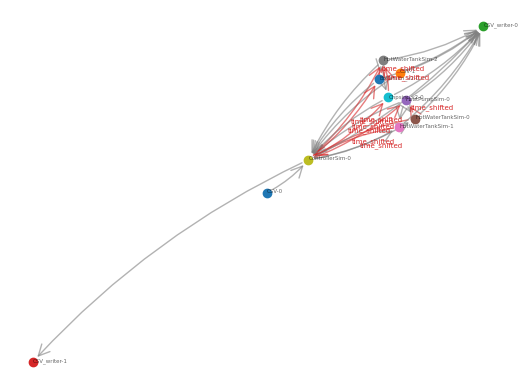

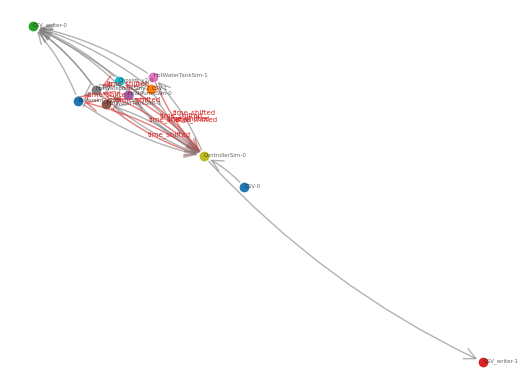

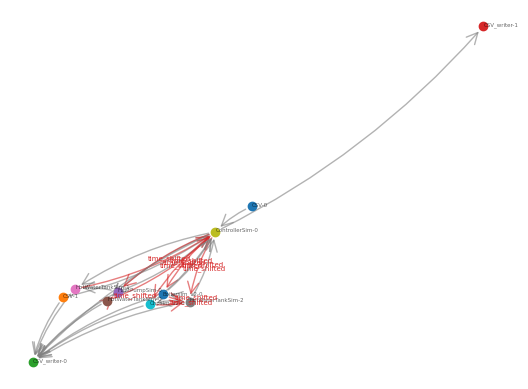

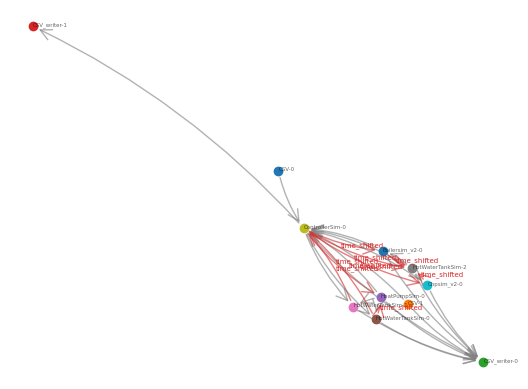

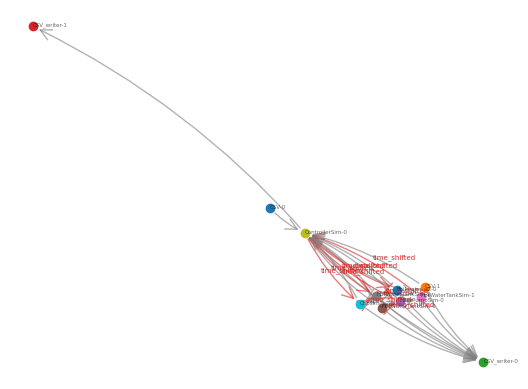

In [4]:
input_params_path = os.path.join(current_dir, "..", 'data/inputs/input_params.json')
input_data_path = os.path.join(current_dir, "..", 'data/outputs/DES_data.csv')
scenario_path = os.path.join(current_dir, "..", 'data/inputs/scenario.pkl')

with open(input_params_path, 'r') as file:
    input_params = json.load(file)

results = []

num_cores = multiprocessing.cpu_count()
# def run_instance(params):
#     run_DES(params)

for i in range(len(df_combinations[0:5])):

    des_config_i = df_combinations.iloc[i]

    # overwrite old values with new values for the new DES config 
    input_params['hp']['hp_model'] = des_config_i['hp']
    input_params['chp']['nom_P_th'] = des_config_i['chp']
    input_params['boiler']['nom_P_th'] = des_config_i['boiler']
    #TODO: input_params['pv']['nom_Pp'] = des_config_i['pv']
    input_params['ctrl']['supply_config'] = des_config_i['supply_config']
    input_params['tank']['heating_rods']['hr_1']['mode'] = des_config_i['hr_mode']
    input_params['ctrl']['T_dhw_sp'] = des_config_i['T_dhw_sp']
    input_params['tank']['volume'] = des_config_i['hwt_volume']

    # write new config in the input_params.json file 
    # with open(input_params_path, 'w') as file:
    #     json.dump(input_params, file, indent=4, default=lambda x: int(x) if hasattr(x, "item") else x)

    # simulate DES_sim with input_params
    """run_DES(input_params.json)"""
    run_DES(input_params)
        #multiprocessing still not ready!!

    # post processing with scenario parameters in scenario.pkl
    """ run postprocessing script with 'DES_data.csv' and 'scenario.pkl' """
    cost, co2 = postprocessing(input_data_path, input_params_path, scenario_path)

    row = {**des_config_i, "costs": cost, "co2": co2}
    results.append(row)

data = pd.DataFrame(results)

# it takes around 1m 52s to read, change and write 8208 combination parameters

In [5]:
# input_params_path = os.path.join(current_dir, "../..", 'data/inputs/input_params.json')
# input_data_path = os.path.join(current_dir, "../..", 'data/outputs/DES_data.csv')
# scenario_path = os.path.join(current_dir, "../..", 'data/inputs/scenario.pkl')

# # read existing input_params.json into dictionary
# with open(input_params_path, 'r') as file:
#     input_params = json.load(file)
# def run_instance(params):
#     # each worker gets its own params dict
#     run_DES(params)

# results = []
# batch_size = 6
# num_cores = multiprocessing.cpu_count()

# for start in range(0, batch_size*2, batch_size):
#     batch = df_combinations.iloc[start:start+batch_size]

#     batch_params = []
#     for _, des_config_i in batch.iterrows():
#         # copy input_params for this config (important: copy, not overwrite!)
#         config_params = json.loads(json.dumps(input_params))  # deep copy via json

#         # overwrite values
#         config_params['hp']['hp_model'] = des_config_i['hp']
#         config_params['chp']['nom_P_th'] = des_config_i['chp']
#         config_params['boiler']['nom_P_th'] = des_config_i['boiler']
#         #TODO: config_params['pv']['nom_Pp'] = des_config_i['pv']
#         config_params['ctrl']['supply_config'] = des_config_i['supply_config']
#         config_params['tank']['heating_rods']['hr_1']['mode'] = des_config_i['hr_mode']
#         config_params['ctrl']['T_dhw_sp'] = des_config_i['T_dhw_sp']
#         config_params['tank']['volume'] = des_config_i['hwt_volume']

#         batch_params.append((config_params, des_config_i))

#     # run in parallel
#     # with multiprocessing.Pool(processes=batch_size) as pool:
#     #     pool_results = pool.map(run_instance, [bp[0] for bp in batch_params])

#     with multiprocessing.Pool(processes=batch_size) as pool:
#         pool_results = pool.map(run_instance, batch_params[0])

#     # collect results 
#     # for (params_dict, des_config_i), res in zip(batch_params, pool_results):
#     #     cost, co2 = postprocessing(input_data_path, input_params_path, scenario_path)
#     #     row = {**des_config_i, "costs": cost, "co2": co2}
#     #     results.append(row)

# data = pd.DataFrame(results)


In [6]:
i

4